# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('/Users/adimalik/Documents/GitHub/lab-supervised-learning/data/website.csv')
pd.set_option('display.max_columns', None)

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
websites

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0,0,0,0,0.0,0


In [4]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
website_features = [
    "URL",
    "URL_LENGTH",
    "NUMBER_SPECIAL_CHARACTERS",
    "CHARSET",
    "SERVER",
    "CONTENT_LENGTH",
    "WHOIS_COUNTRY",
    "WHOIS_STATEPRO",
    "WHOIS_REGDATE",
    "WHOIS_UPDATED_DATE",
    "DIST_REMOTE_TCP_PORT",
    "REMOTE_IPS",
    "APP_BYTES",
    "SOURCE_APP_PACKETS",
    "REMOTE_APP_PACKETS",
    "SOURCE_APP_BYTES",
    "REMOTE_APP_BYTES",
    "APP_PACKETS",
    "DNS_QUERY_TIMES"
]

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

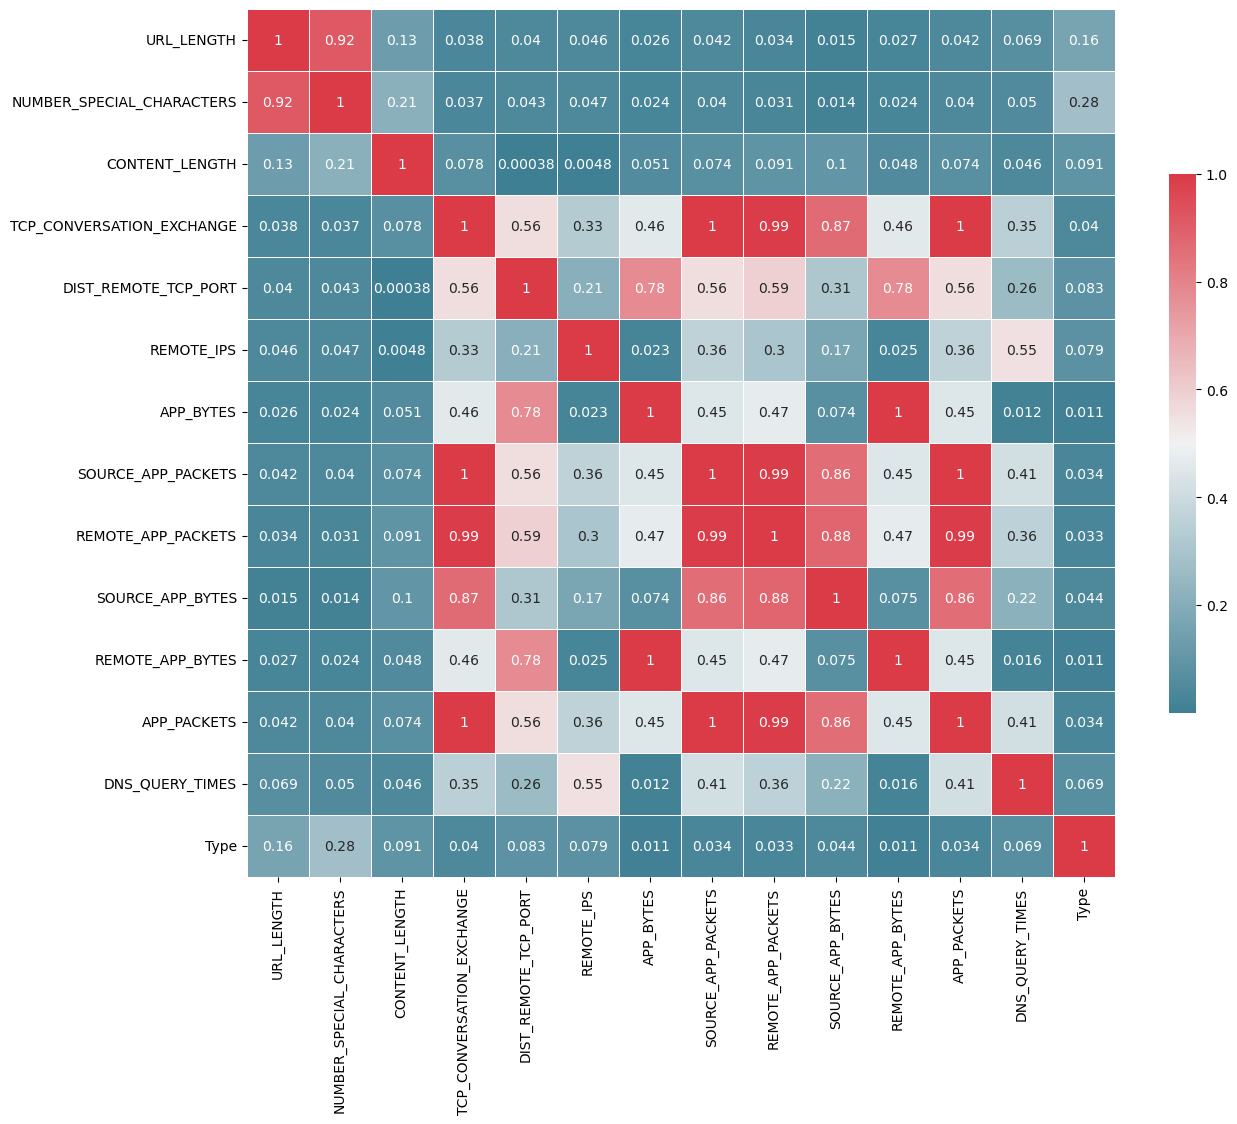

In [6]:
numeric_data = websites.select_dtypes(include=['number'])
# It appears there was a typo in the previous code snippet. Let's correct it and use seaborn directly.
import seaborn as sns

# Recalculate the correlation matrix for clarity and ensure everything is set correctly
corr = np.abs(numeric_data.corr())

# Set up the matplotlib figure again
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap for the whole square without the mask
sns.heatmap(corr, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, cmap=cmap)
plt.show()

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [7]:
websites.drop('APP_PACKETS', axis=1, inplace=True)

websites.drop('REMOTE_APP_PACKETS', axis=1, inplace=True)

websites.drop('SOURCE_APP_PACKETS', axis=1, inplace=True)

# websites.drop('DIST_REMOTE_TCP_PORT', axis=1, inplace=True)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [8]:
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [9]:
websites.drop(columns=['CONTENT_LENGTH'], inplace=True)

In [10]:
websites.dropna(inplace=True)

print("Remaining missing values:")
print(websites.isnull().sum())

Remaining missing values:
URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [11]:
websites.isnull().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [12]:
websites['WHOIS_COUNTRY'].unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [13]:
websites['WHOIS_COUNTRY'].replace({
    'Cyprus': 'CY',
    'us': 'US',
    'se': 'SE',
    'GB' : 'UK',
    'United Kingdom': 'UK',
    "[u'GB'; u'UK']": 'UK'
}, inplace=True)

websites['WHOIS_COUNTRY'].unique()

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

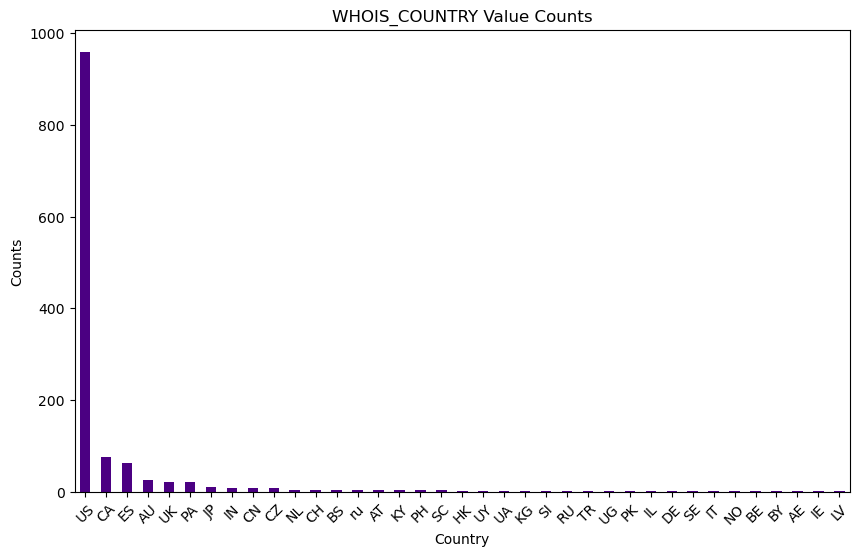

In [14]:
websites['WHOIS_COUNTRY'].value_counts().plot(kind='bar', figsize=(10, 6), color='indigo')

plt.title('WHOIS_COUNTRY Value Counts')

plt.xlabel('Country')

plt.ylabel('Counts')

plt.xticks(rotation=45) 

plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

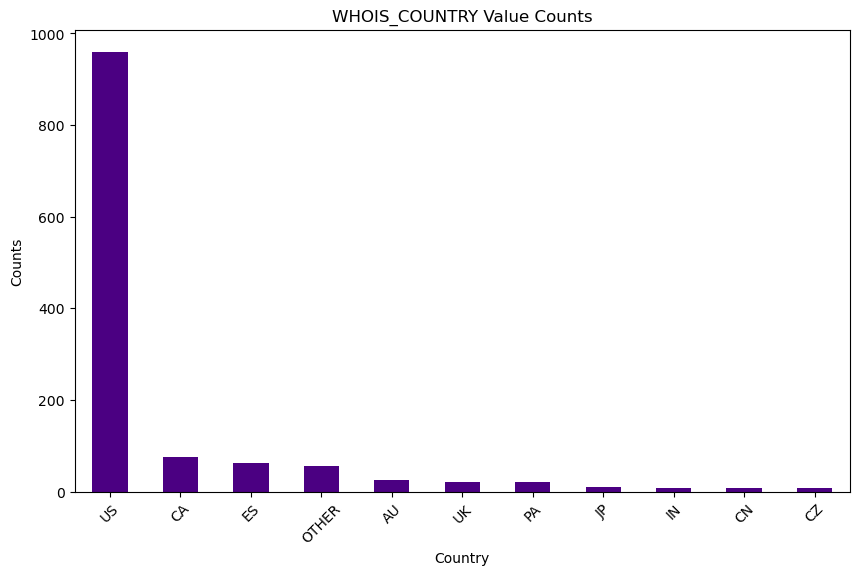

In [15]:
top_10_countries = websites['WHOIS_COUNTRY'].value_counts().nlargest(10).index

websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')

websites['WHOIS_COUNTRY'].value_counts().plot(kind='bar', figsize=(10, 6), color='indigo')

plt.title('WHOIS_COUNTRY Value Counts')

plt.xlabel('Country')

plt.ylabel('Counts')

plt.xticks(rotation=45) 

plt.show()

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [16]:
websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

In [17]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT',
       'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [18]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1257 non-null   object 
 1   URL_LENGTH                 1257 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 3   CHARSET                    1257 non-null   object 
 4   SERVER                     1257 non-null   object 
 5   WHOIS_COUNTRY              1257 non-null   object 
 6   TCP_CONVERSATION_EXCHANGE  1257 non-null   int64  
 7   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 8   REMOTE_IPS                 1257 non-null   int64  
 9   APP_BYTES                  1257 non-null   int64  
 10  SOURCE_APP_BYTES           1257 non-null   int64  
 11  REMOTE_APP_BYTES           1257 non-null   int64  
 12  DNS_QUERY_TIMES            1257 non-null   float64
 13  Type                       1257 non-null   int64  
dt

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [19]:
websites.drop('URL', axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [20]:
websites['CHARSET'].value_counts()

CHARSET
UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [21]:
websites['SERVER'].value_counts()


SERVER
Apache                                                                                311
nginx                                                                                 144
cloudflare-nginx                                                                       80
Microsoft-HTTPAPI/2.0                                                                  76
GSE                                                                                    49
                                                                                     ... 
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40      1
mw2114.codfw.wmnet                                                                      1
mw2199.codfw.wmnet                                                                      1
fbs                                                                                     1
Apache/2.2.16 (Debian)                                                                  1
Nam

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [22]:
websites['SERVER'] = websites['SERVER'].astype(str)

websites['SERVER'] = websites['SERVER'].apply(lambda x: 'Microsoft' if 'Microsoft' in x else
                                    ('Apache' if 'Apache' in x else
                                    ('nginx' if 'nginx' in x else 'Other')))

In [23]:
websites['SERVER'].value_counts()

SERVER
Apache       491
nginx        322
Other        300
Microsoft    144
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [24]:
website_dummy = pd.get_dummies(websites, drop_first=True)

In [25]:
website_dummy = website_dummy.dropna()

In [26]:
website_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
3,17,6,31,22,3,3812,18784,4380,8.0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
5,18,7,11,6,9,894,838,894,0.0,0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
6,18,6,12,0,3,1189,8559,1327,2.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,19,6,0,0,0,0,0,0,0.0,0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
10,20,6,0,0,0,0,0,0,0.0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [27]:
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1257 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 2   TCP_CONVERSATION_EXCHANGE  1257 non-null   int64  
 3   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 4   REMOTE_IPS                 1257 non-null   int64  
 5   APP_BYTES                  1257 non-null   int64  
 6   SOURCE_APP_BYTES           1257 non-null   int64  
 7   REMOTE_APP_BYTES           1257 non-null   int64  
 8   DNS_QUERY_TIMES            1257 non-null   float64
 9   Type                       1257 non-null   int64  
 10  CHARSET_UTF-8              1257 non-null   bool   
 11  CHARSET_iso-8859-1         1257 non-null   bool   
 12  CHARSET_us-ascii           1257 non-null   bool   
 13  CHARSET_utf-8              1257 non-null   bool   
 1

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [28]:
from sklearn.model_selection import train_test_split

# Features
X = website_dummy.drop('Type', axis=1)

# Target variable
y = website_dummy['Type']

# Split between train and test (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [29]:
print(f"X_train shape: {X_train.shape}")

print(f"X_test shape: {X_test.shape}")

print(f"y_train shape: {y_train.shape}")

print(f"y_test shape: {y_test.shape}")

X_train shape: (1005, 28)
X_test shape: (252, 28)
y_train shape: (1005,)
y_test shape: (252,)


In [30]:
X.isnull().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
DNS_QUERY_TIMES              0
CHARSET_UTF-8                0
CHARSET_iso-8859-1           0
CHARSET_us-ascii             0
CHARSET_utf-8                0
CHARSET_windows-1251         0
CHARSET_windows-1252         0
SERVER_Microsoft             0
SERVER_Other                 0
SERVER_nginx                 0
WHOIS_COUNTRY_CA             0
WHOIS_COUNTRY_CN             0
WHOIS_COUNTRY_CZ             0
WHOIS_COUNTRY_ES             0
WHOIS_COUNTRY_IN             0
WHOIS_COUNTRY_JP             0
WHOIS_COUNTRY_OTHER          0
WHOIS_COUNTRY_PA             0
WHOIS_COUNTRY_UK             0
WHOIS_COUNTRY_US             0
dtype: int64

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [31]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1500)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [32]:
logistic_model.fit(X_train, y_train)

/Users/adimalik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1500)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = logistic_model.predict(X_test)

# Calculate and print the confusion matrix and accuracy score
conf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")

print(conf_matrix)

print("\nAccuracy Score:", acc_score)

Confusion Matrix:
[[215   6]
 [ 11  20]]

Accuracy Score: 0.9325396825396826


What are your thoughts on the performance of the model? Write your conclusions below.

In [40]:
'''The logistic regression model achieved an accuracy score of approximately 93.25% on the testing data, 
which indicates that the model is performing relatively well. 
However, it's essential to analyze the confusion matrix to gain deeper insights into its performance:

True Positives (TP): 215
False Positives (FP): 6
False Negatives (FN): 11
True Negatives (TN): 20

From the confusion matrix, we can observe that:

The model correctly classified 215 instances as legitimate websites (True Negatives).

It correctly classified 6 instances as malicious websites (True Positives).

There were 8 instances where the model incorrectly classified legitimate websites as malicious (False Positives).

There were 20 instances where the model incorrectly classified malicious websites as legitimate (False Negatives).

Overall, the model demonstrates good performance with a high accuracy score. 

However, the presence of false positives and false negatives suggests that there is still room for improvement, 
especially in reducing the misclassification of legitimate websites as malicious (false positives) and vice versa 
(false negatives). Depending on the specific application and its associated costs, further tuning of the model or 
exploring other algorithms might be necessary to optimize performance.'''

"The logistic regression model achieved an accuracy score of approximately 93.25% on the testing data, \nwhich indicates that the model is performing relatively well. \nHowever, it's essential to analyze the confusion matrix to gain deeper insights into its performance:\n\nTrue Positives (TP): 215\nFalse Positives (FP): 6\nFalse Negatives (FN): 11\nTrue Negatives (TN): 20\n\nFrom the confusion matrix, we can observe that:\n\nThe model correctly classified 215 instances as legitimate websites (True Negatives).\n\nIt correctly classified 6 instances as malicious websites (True Positives).\n\nThere were 8 instances where the model incorrectly classified legitimate websites as malicious (False Positives).\n\nThere were 20 instances where the model incorrectly classified malicious websites as legitimate (False Negatives).\n\nOverall, the model demonstrates good performance with a high accuracy score. \n\nHowever, the presence of false positives and false negatives suggests that there is sti

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict the labels for the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate and print the confusion matrix and accuracy score
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
acc_score_knn = accuracy_score(y_test, y_pred_knn)

print("Confusion Matrix for KNN (k=3):")
print(conf_matrix_knn)
print("\nAccuracy Score for KNN (k=3):", acc_score_knn)

Confusion Matrix for KNN (k=3):
[[212   9]
 [  9  22]]

Accuracy Score for KNN (k=3): 0.9285714285714286


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [37]:
# Initialize the KNN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate and print the confusion matrix and accuracy score
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
acc_score_knn = accuracy_score(y_test, y_pred_knn)

print("Confusion Matrix for KNN (k=5):")
print(conf_matrix_knn)
print("\nAccuracy Score for KNN (k=5):", acc_score_knn)

Confusion Matrix for KNN (k=5):
[[215   6]
 [ 10  21]]

Accuracy Score for KNN (k=5): 0.9365079365079365


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [41]:
'''When increasing the value of k from 3 to 5 in the K-Nearest Neighbors (KNN) algorithm, 
we observe the following changes in the confusion matrix and accuracy score:

For k=3:

Confusion Matrix:
[212   9]
[  9  22]
Accuracy Score: 0.9285

For k=5:

Confusion Matrix:
[215   6]
[ 10  21]
Accuracy Score: 0.9365

Comparing the two models:

Confusion Matrix:
For both k=3 and k=5, the number of true positives and true negatives increases, while the number of false positives 
and false negatives decreases slightly when moving from k=3 to k=5. This suggests that increasing k helps in 
improving the classification accuracy, especially in reducing misclassifications.

Accuracy Score:
The accuracy score improves from approximately 92.85% (k=3) to 93.65% (k=5) when increasing k. This indicates that 
the model with k=5 performs slightly better in terms of overall accuracy compared to the model with k=3.

In conclusion, increasing the value of k from 3 to 5 leads to a slight improvement in both the confusion matrix and 
the accuracy score, suggesting that the KNN model with k=5 provides better performance in this scenario. However, 
it's essential to consider other factors such as computational efficiency and the trade-off between bias and 
variance when choosing the optimal value of k for a KNN model.'''

"When increasing the value of k from 3 to 5 in the K-Nearest Neighbors (KNN) algorithm, \nwe observe the following changes in the confusion matrix and accuracy score:\n\nFor k=3:\n\nConfusion Matrix:\n[212   9]\n[  9  22]\nAccuracy Score: 0.9285\n\nFor k=5:\n\nConfusion Matrix:\n[215   6]\n[ 10  21]\nAccuracy Score: 0.9365\n\nComparing the two models:\n\nConfusion Matrix:\nFor both k=3 and k=5, the number of true positives and true negatives increases, while the number of false positives \nand false negatives decreases slightly when moving from k=3 to k=5. This suggests that increasing k helps in \nimproving the classification accuracy, especially in reducing misclassifications.\n\nAccuracy Score:\nThe accuracy score improves from approximately 92.85% (k=3) to 93.65% (k=5) when increasing k. This indicates that \nthe model with k=5 performs slightly better in terms of overall accuracy compared to the model with k=3.\n\nIn conclusion, increasing the value of k from 3 to 5 leads to a sli

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [39]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the X_train data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the X_test data
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model with scaled data
logistic_model_scaled = LogisticRegression(max_iter=1500)
logistic_model_scaled.fit(X_train_scaled, y_train)

# Predict the labels for the scaled X_test data
y_pred_scaled = logistic_model_scaled.predict(X_test_scaled)

# Calculate and print the confusion matrix and the accuracy score for the scaled data
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
acc_score_scaled = accuracy_score(y_test, y_pred_scaled)

print("Confusion Matrix for Scaled Data:")
print(conf_matrix_scaled)
print("Accuracy Score with Feature Scaling:", acc_score_scaled)

Confusion Matrix for Scaled Data:
[[215   6]
 [ 11  20]]
Accuracy Score with Feature Scaling: 0.9325396825396826
